# home work airbnb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import *
from sklearn.preprocessing import LabelBinarizer

# sns.set_style("white", {'ytick.major.size': 10.0})
# sns.set_context("poster", font_scale=1.1)

In [2]:
# age = pd.read_csv('C:\\DAL database\Airbnb_New_User_Bookings\\age_gender_bkts.csv')
# countries = pd.read_csv('C:\\DAL database\Airbnb_New_User_Bookings\\countries.csv')
# ssn = pd.read_csv('C:\\DAL database\Airbnb_New_User_Bookings\\sample_submission_NDF.csv')
# sessions = pd.read_csv('C:\\DAL database\Airbnb_New_User_Bookings\\sessions.csv')
test = pd.read_csv('C:\\DAL database\Airbnb_New_User_Bookings\\test_users.csv')
train = pd.read_csv('C:\\DAL database\Airbnb_New_User_Bookings\\train_users_2.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [4]:
test.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [5]:
train.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [7]:
country_gender_visits = pd.pivot_table(train,index='country_destination',columns='gender',values='id',aggfunc='count',margins=True)

for x in country_gender_visits.columns:
    country_gender_visits[x+'_%'] = country_gender_visits[x]/country_gender_visits.All*100  
    
country_gender_visits

gender,-unknown-,FEMALE,MALE,OTHER,All,-unknown-_%,FEMALE_%,MALE_%,OTHER_%,All_%
country_destination,,,,,,,,,,
AU,143.0,207.0,188.0,1.0,539.0,26.530612,38.404453,34.879406,0.185529,100.0
CA,491.0,455.0,477.0,5.0,1428.0,34.383754,31.862745,33.403361,0.350140,100.0
DE,284.0,358.0,416.0,3.0,1061.0,26.767201,33.741753,39.208294,0.282752,100.0
ES,715.0,853.0,677.0,4.0,2249.0,31.791908,37.927968,30.102268,0.177857,100.0
FR,1713.0,1962.0,1335.0,13.0,5023.0,34.103126,39.060323,26.577742,0.258809,100.0
GB,758.0,881.0,682.0,3.0,2324.0,32.616179,37.908778,29.345955,0.129088,100.0
IT,1040.0,1091.0,699.0,5.0,2835.0,36.684303,38.483245,24.656085,0.176367,100.0
NDF,66670.0,31048.0,26719.0,106.0,124543.0,53.531712,24.929542,21.453634,0.085111,100.0
NL,227.0,254.0,278.0,3.0,762.0,29.790026,33.333333,36.482940,0.393701,100.0


Text(0.5,0,'country')

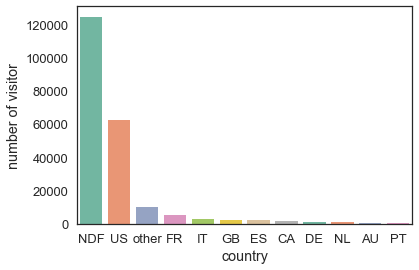

In [8]:
# 查看各国家订房人数
sns.set(style='white',context='talk')
ax=sns.barplot(train.country_destination.value_counts().index,train.country_destination.value_counts(),palette='Set2')
ax.set_ylabel('number of visitor')
ax.set_xlabel('country')

Text(0,0.5,'number of visitor')

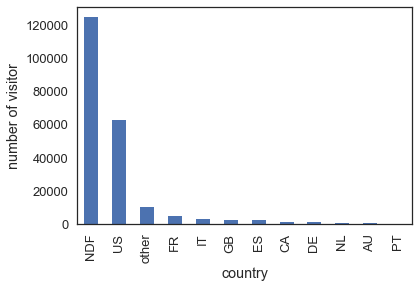

In [9]:
train.country_destination.value_counts().plot(kind='bar')
plt.xlabel('country')
plt.ylabel('number of visitor')

Text(0.5,1,'number of gender in traindata')

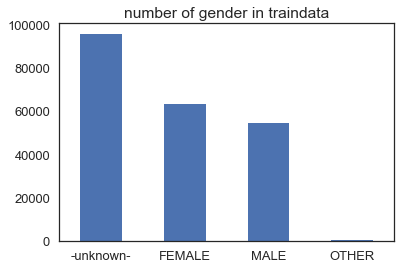

In [10]:
train.gender.value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.title('number of gender in traindata')

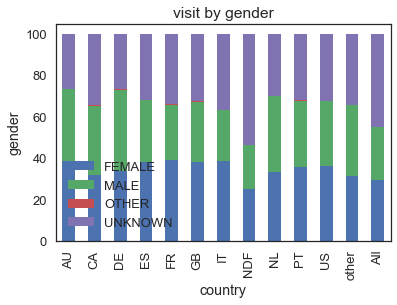

In [11]:
#看看各国家性别结构
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

df=pd.DataFrame({'MALE':country_gender_visits['MALE_%'],
                 'FEMALE':country_gender_visits['FEMALE_%'],
                 'UNKNOWN':country_gender_visits['-unknown-_%'],
                'OTHER':country_gender_visits['OTHER_%']})
df.plot(kind='bar', stacked=True)
plt.title("visit by gender")
plt.xlabel("country") 
plt.ylabel("gender") 
plt.show()

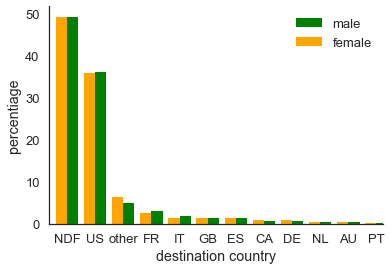

In [12]:
female_destination = train.loc[train['gender']=='FEMALE','country_destination'].value_counts() /sum(train['gender']=='FEMALE') * 100
# loc[key,index]
male_destination = train.loc[train['gender']=='MALE','country_destination'].value_counts() / sum(train['gender']=='MALE')*100
female_destination.plot(kind='bar',width = 0.4,color='green',position=0,label='male',rot=0)
male_destination.plot(kind='bar',width = 0.4,color='orange',position=1,label='female',rot=0)

plt.legend() # 图例
plt.xlabel('destination country')
plt.ylabel('percentiage')
sns.despine() # 去除了一半的边框
plt.show()

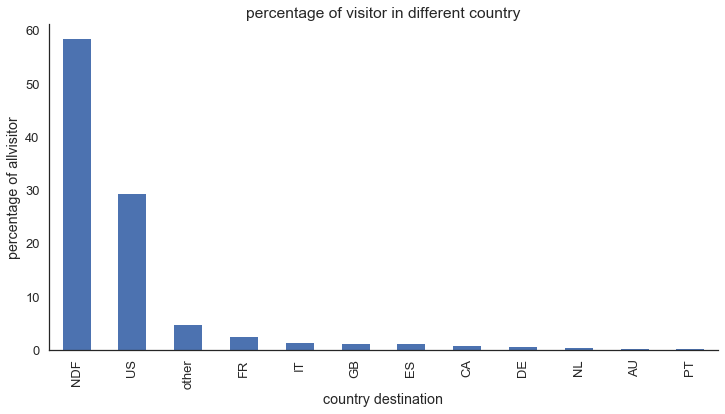

In [13]:
destination_percentage = train.country_destination.value_counts() / sum(train.country_destination.value_counts().values)*100
destination_percentage.plot(kind='bar',figsize=(12,6))
plt.xlabel('country destination')
plt.ylabel('percentage of allvisitor')
plt.title('percentage of visitor in different country')
sns.despine()
plt.show()

In [14]:
country_gender_age = pd.pivot_table(train,index='country_destination',columns='gender',values='age',margins=True,aggfunc='mean')
country_gender_age

gender,-unknown-,FEMALE,MALE,OTHER,All
country_destination,,,,,
AU,41.218750,37.688776,49.200000,29.000000,42.807339
CA,71.414141,46.167059,41.955457,32.800000,48.990715
DE,39.024590,53.775758,57.944444,38.000000,53.545241
ES,45.377778,42.031095,52.070064,33.750000,46.236811
FR,46.466667,50.628099,45.411952,37.846154,48.114193
GB,40.736301,52.443099,51.563553,35.333333,50.163472
IT,45.958333,57.783757,42.098613,38.400000,50.645383
NDF,52.046618,55.088536,48.038585,67.985075,51.830034
NL,57.742574,61.072961,44.694340,30.333333,53.151163


Text(0,0.5,'avg_age')

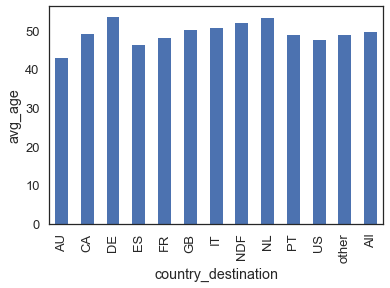

In [15]:
ax = country_gender_age.All.plot(kind='bar')
plt.ylabel('avg_age')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


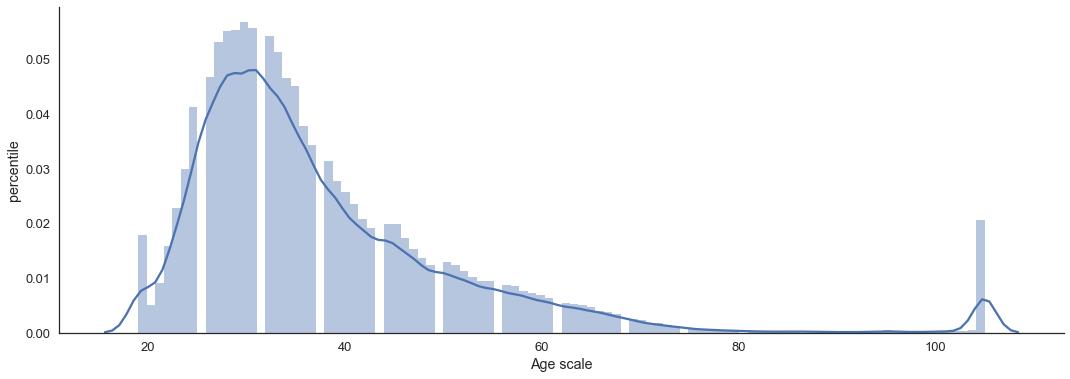

In [16]:
ulimit = np.percentile(train.age.dropna().values,99)
llimit = np.percentile(train.age.dropna().values,1)
train['age'].loc[train['age']>ulimit] = ulimit
train['age'].loc[train['age']<llimit] = llimit

plt.figure(figsize=(18,6))
sns.distplot(train.age.dropna(),bins=100)
plt.xlabel('Age scale')
plt.ylabel('percentile')
sns.despine()
plt.show()

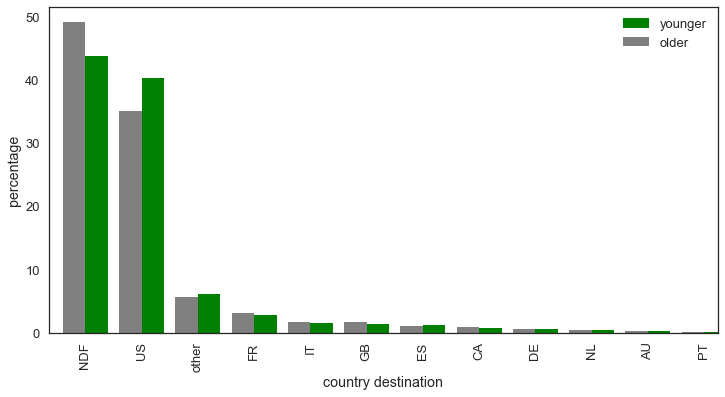

In [17]:
# As expected,the common age to travel is between 25 and 40.Let's see if, for example,older people travel in a different way.Let's pick an arbitrary age to split into two groups.Maybe 40?

age = 40

younger = sum(train.loc[train['age']<=age,'country_destination'].value_counts())
older = sum(train.loc[train['age']>age,'country_destination'].value_counts())

younger_destination = train.loc[train['age']<=age,'country_destination'].value_counts()/younger * 100
older_destination = train.loc[train['age']>age,'country_destination'].value_counts()/older * 100

plt.figure(figsize=(12,6))
younger_destination.plot(kind='bar',width=0.4,position=0,label='younger',color='green')
older_destination.plot(kind='bar',width=0.4,position=1,label='older',color='gray')

plt.legend()
plt.xlabel('country destination')
plt.ylabel('percentage')
plt.show()

In [18]:
# think about the importance of the native lenguage in choosing the destination country.
print('the pecentage of en users :',sum(train['language']=='en')/train.shape[0]*100)

the pecentage of en users : 96.6563754679


In [19]:
country_sigmet_visits=pd.pivot_table(train,index='country_destination',columns='signup_method',values='id',aggfunc='count',fill_value=0,margins=True)
for i in country_sigmet_visits.columns:
    country_sigmet_visits[i+'_%']=country_sigmet_visits[i]/country_sigmet_visits['All']*100
country_sigmet_visits

signup_method,basic,facebook,google,All,basic_%,facebook_%,google_%,All_%
country_destination,,,,,,,,
AU,393.0,146.0,0.0,539.0,72.912801,27.087199,0.000000,100.0
CA,1105.0,322.0,1.0,1428.0,77.380952,22.549020,0.070028,100.0
DE,737.0,323.0,1.0,1061.0,69.462771,30.442978,0.094251,100.0
ES,1601.0,646.0,2.0,2249.0,71.187194,28.723877,0.088928,100.0
FR,3767.0,1253.0,3.0,5023.0,74.995023,24.945252,0.059725,100.0
GB,1727.0,597.0,0.0,2324.0,74.311532,25.688468,0.000000,100.0
IT,2147.0,686.0,2.0,2835.0,75.731922,24.197531,0.070547,100.0
NDF,87846.0,36252.0,445.0,124543.0,70.534675,29.108019,0.357306,100.0
NL,560.0,202.0,0.0,762.0,73.490814,26.509186,0.000000,100.0


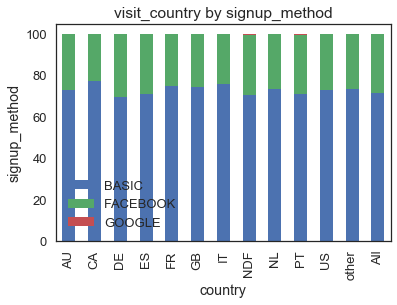

In [20]:
df=pd.DataFrame({'BASIC':country_sigmet_visits['basic_%'],
                 'FACEBOOK':country_sigmet_visits['facebook_%'],
                 'GOOGLE':country_sigmet_visits['google_%']
                })
df.plot(kind='bar', stacked=True)
plt.title("visit_country by signup_method")
plt.xlabel("country") 
plt.ylabel("signup_method") 
plt.show()

# Concat traindata and testdata

In [21]:
fulldata = pd.concat((train,test),axis=0,ignore_index=True)
fulldata

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758


In [22]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 33.6+ MB


In [23]:
fulldata_nan = fulldata.isnull().sum()/fulldata.shape[0]*100
fulldata_nan.loc[fulldata_nan.values>0]

age                        42.412365
country_destination        22.535538
date_first_booking         67.733998
first_affiliate_tracked     2.208335
dtype: float64

In [24]:
fulldata.age.describe()

count    158681.000000
mean         37.789609
std          36.519253
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2002.000000
Name: age, dtype: float64

In [25]:
fulldata['date_account_created'] = pd.to_datetime(fulldata['date_account_created'])
fulldata['date_first_booking'] = pd.to_datetime(fulldata['date_first_booking'])
fulldata['date_first_active'] = pd.to_datetime((fulldata.timestamp_first_active // 1000000), format='%Y%m%d')

In [26]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 17 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
date_first_active          275547 non-null datetime64[ns]
dtypes: datetime6

In [27]:
fulldata['language'] = fulldata['language'].astype('category')
fulldata['language']

0         en
1         en
2         en
3         en
4         en
5         en
6         en
7         en
8         en
9         en
10        en
11        en
12        en
13        en
14        en
15        en
16        en
17        en
18        en
19        en
20        en
21        en
22        en
23        en
24        en
25        en
26        en
27        en
28        en
29        en
          ..
275517    en
275518    en
275519    en
275520    en
275521    en
275522    en
275523    en
275524    en
275525    en
275526    en
275527    en
275528    en
275529    en
275530    en
275531    en
275532    en
275533    en
275534    en
275535    en
275536    en
275537    en
275538    en
275539    en
275540    en
275541    en
275542    en
275543    ko
275544    de
275545    en
275546    en
Name: language, Length: 275547, dtype: category
Categories (26, object): [-unknown-, ca, cs, da, ..., sv, th, tr, zh]

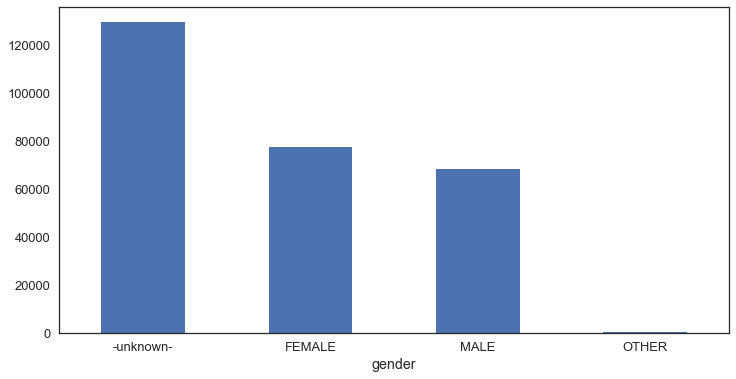

In [28]:
fulldata.gender.value_counts().plot(kind='bar',figsize=(12,6),rot=0) #rot=0,即为rotation='horizontal
plt.xlabel('gender')
# plt.xticks(rotation='horizontal')
plt.show()

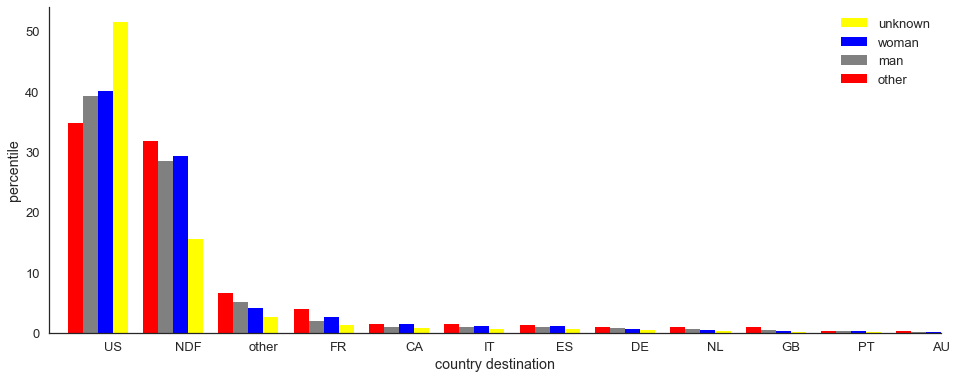

In [29]:
# to see if there is any gender preferences when travelling
unknown = sum(fulldata.gender.loc[fulldata['gender']=='-unknown-'].value_counts())
female = sum(fulldata.gender.loc[fulldata['gender']=='FEMALE'].value_counts())
male = sum(fulldata.gender.loc[fulldata['gender']=='MALE'].value_counts())
other = sum(fulldata.gender.loc[fulldata['gender']=='OTHER'].value_counts())

unknown_destination = fulldata.loc[fulldata['gender']=='-unknown-','country_destination'].value_counts()/unknown*100
female_destination = fulldata.loc[fulldata['gender']=='FEMALE','country_destination'].value_counts()/female*100
male_destination = fulldata.loc[fulldata['gender']=='MALE','country_destination'].value_counts()/male*100
other_destination = fulldata.loc[fulldata['gender']=='OTHER','country_destination'].value_counts()/other*100

plt.figure(figsize=(16,6))
width=0.2
unknown_destination.plot(kind='bar',width=width,position=0,color='yellow',rot=0,label='unknown')
female_destination.plot(kind='bar',width=width,position=1,color='blue',rot=0,label='woman')
male_destination.plot(kind='bar',width=width,position=2,color='gray',rot=0,label='man')
other_destination.plot(kind='bar',width=width,position=3,color='red',rot=0,label='other')
plt.legend()
plt.xlabel('country destination')
plt.ylabel('percentile')
sns.despine()
plt.show()

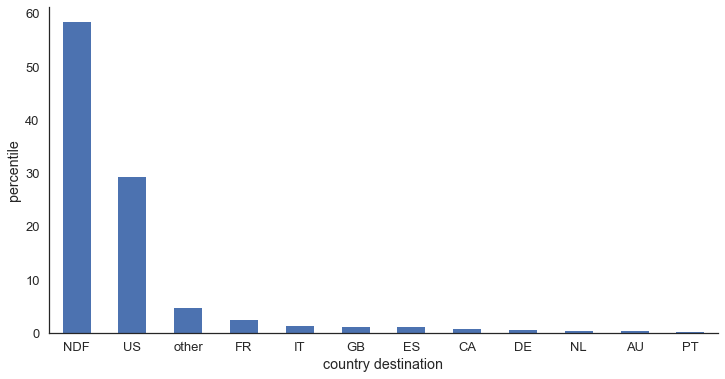

In [30]:
destination_percentile = fulldata.country_destination.value_counts()/sum(fulldata.country_destination.value_counts())*100
destination_percentile.plot(kind='bar',figsize=(12,6),rot=0)
plt.xlabel('country destination')
plt.ylabel('percentile')
sns.despine()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


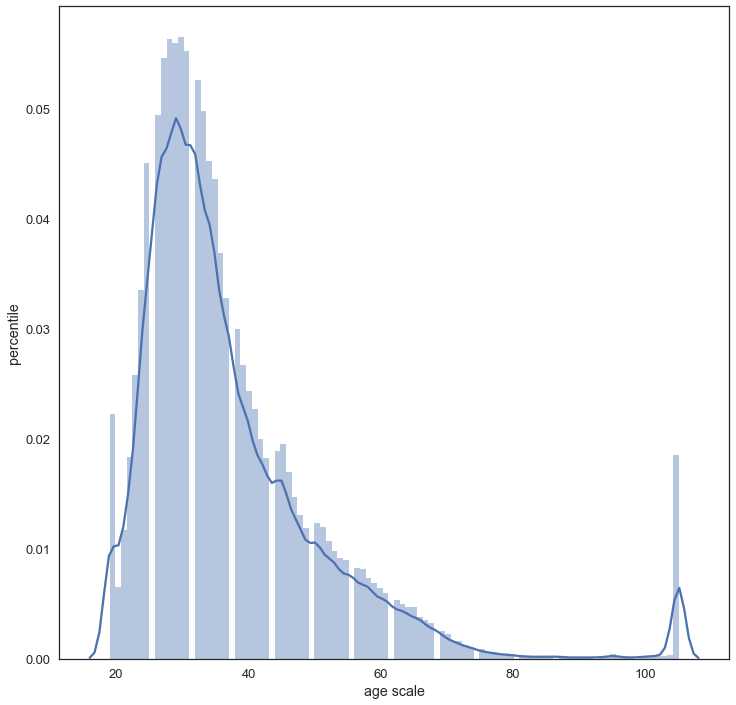

In [31]:
ulimit = np.percentile(fulldata.age.dropna().values,99)
llimit = np.percentile(fulldata.age.dropna().values,1)
fulldata['age'].loc[fulldata['age']>ulimit] = ulimit
fulldata['age'].loc[fulldata['age']<llimit] = llimit

plt.figure(figsize=(12,12))
sns.distplot(fulldata.age.dropna(),bins=100)
plt.xlabel('age scale')
plt.ylabel('percentile')
plt.show()

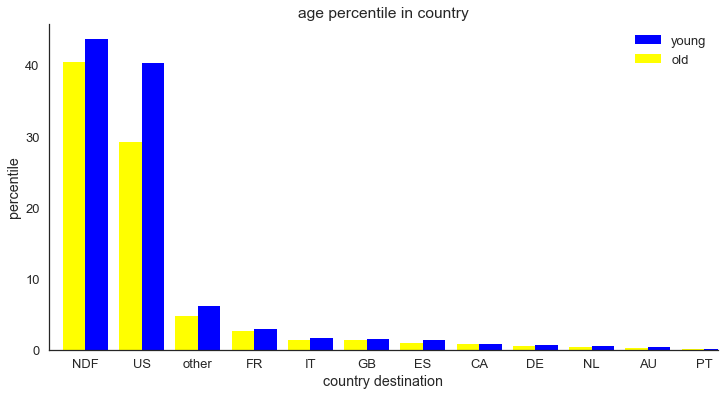

In [32]:
age = 40
young = sum(fulldata.loc[fulldata['age']<age,'country_destination'].value_counts())
old = fulldata.age.loc[fulldata['age']>=age].value_counts()

young_destination = fulldata.loc[fulldata['age']<age,'country_destination'].value_counts()/young*100
old_destination = fulldata.loc[fulldata['age']>=age,'country_destination'].value_counts()/sum(old)*100

young_destination.plot(kind='bar',width=0.4,position=0,color='blue',label='young',rot=0,figsize=(12,6))
old_destination.plot(kind='bar',width=0.4,position=1,color='yellow',label='old',rot=0,figsize=(12,6))
sns.despine()
plt.legend()
plt.xlabel('country destination')
plt.ylabel('percentile')
plt.title('age percentile in country')
plt.show()

In [33]:
# The first thing I thought when reading the problem was the importance of the native lenguage when choosing the destination country. 
# So let's see how manny users use english as main language

print('the percentage of en speaker:',sum(fulldata.language.loc[fulldata['language']=='en'].value_counts())/sum(fulldata.language.value_counts())*100)

the percentage of en speaker: 96.3675888324


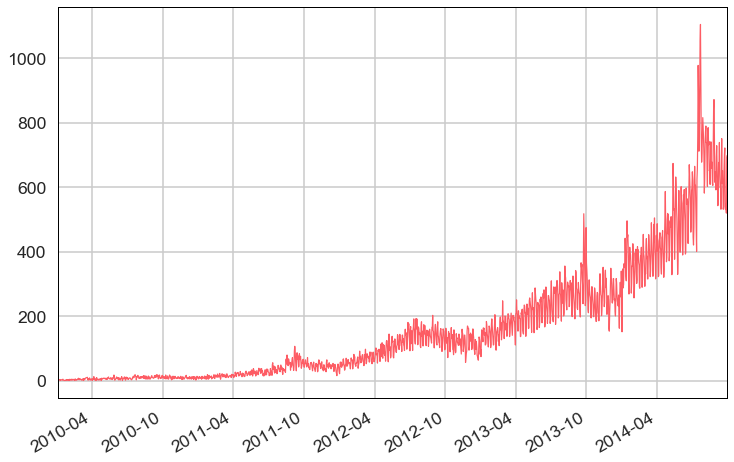

In [34]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
fulldata.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')
plt.show()

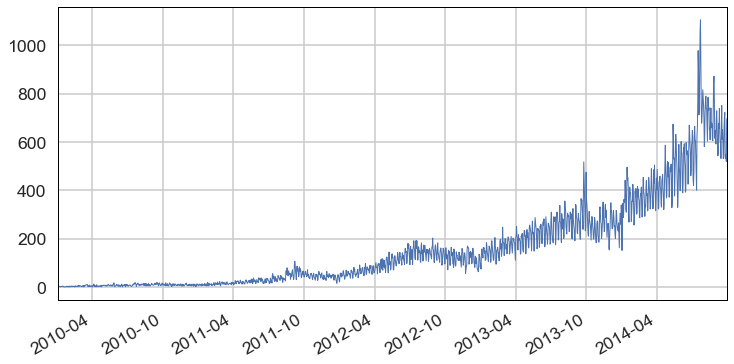

In [35]:
# plot the number of accounts created by time

fulldata.date_account_created.value_counts().plot(kind='line',linewidth=1.0,figsize=(12,6))

# It's appreciable how fast Airbnb has grown over the last 3 years. 
# Does this correlate with the date when the user was active for the first time?

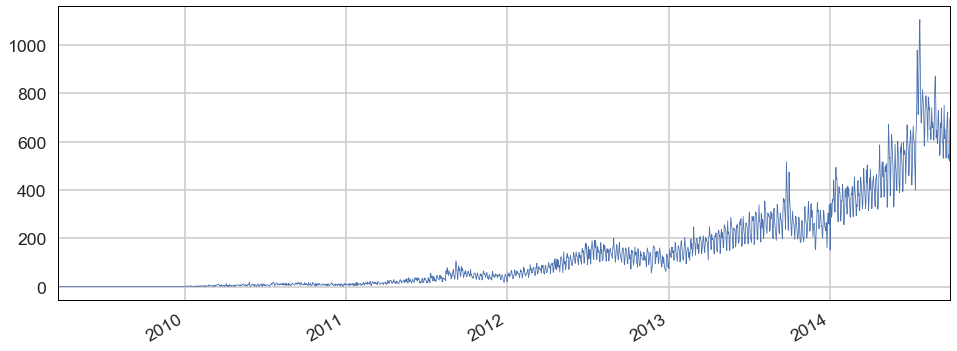

In [36]:
fulldata.date_first_active.value_counts().plot(kind='line',linewidth=0.8,figsize=(16,6))
# We can se that's almost the same as date_account_created, and also, notice the small peaks. 
# We can, either smooth the graph or dig into those peaks. Let's dig in:

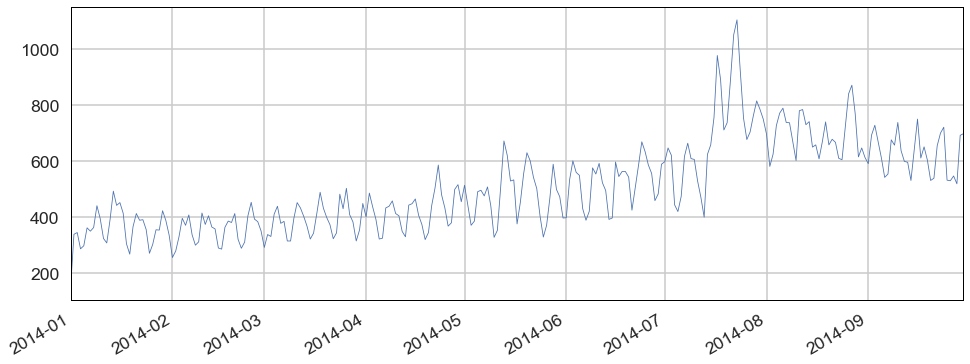

In [37]:
datefirstactive_2014 = fulldata.loc[fulldata['date_first_active']>=pd.to_datetime(20140101,format='%Y%m%d')]
datefirstactive_2014 = datefirstactive_2014.loc[datefirstactive_2014['date_first_active']<pd.to_datetime(20150101,format='%Y%m%d')] 
datefirstactive_2014.date_first_active.value_counts().plot(kind='line',linewidth=0.8,figsize=(16,6))

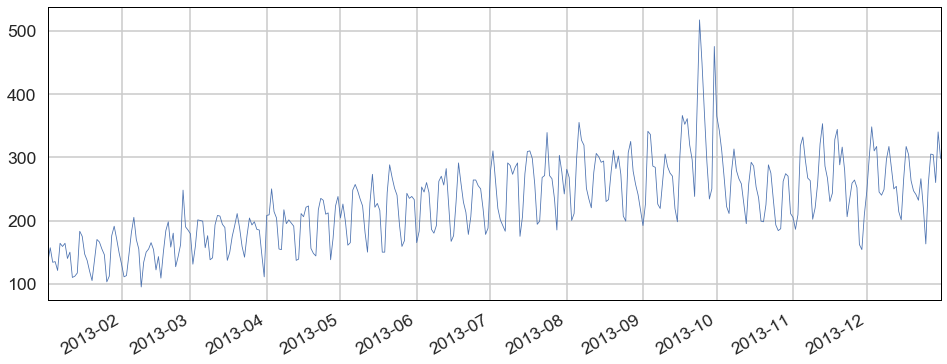

In [38]:
datefirstactive_2013 = fulldata[fulldata['date_first_active']>pd.to_datetime(20130101,format='%Y%m%d')] 
datefirstactive_2013 = datefirstactive_2013[datefirstactive_2013['date_first_active']<pd.to_datetime(20140101,format='%Y%m%d')] 
datefirstactive_2013.date_first_active.value_counts().plot(kind='line',linewidth=0.8,figsize=(16,6))


# At first sight we can see a small pattern, there are some peaks at the same distance. Looking more closely:

Text(0.5,1,'weekday of date_first_active')

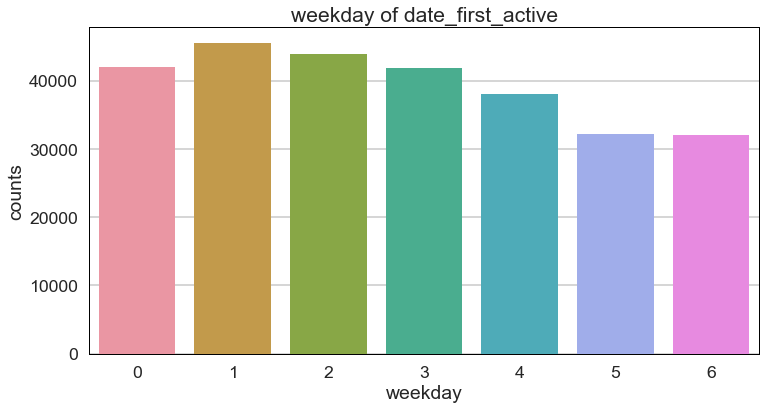

In [39]:
weekdays = []
for day in fulldata.date_first_active:
    weekdays.append(day.weekday())
weekdays = pd.Series(weekdays).value_counts()
plt.figure(figsize=(12,6))
sns.barplot(weekdays.index,weekdays.values)
plt.xlabel('weekday')
plt.ylabel('counts')
plt.title('weekday of date_first_active')

# 0 mean monday

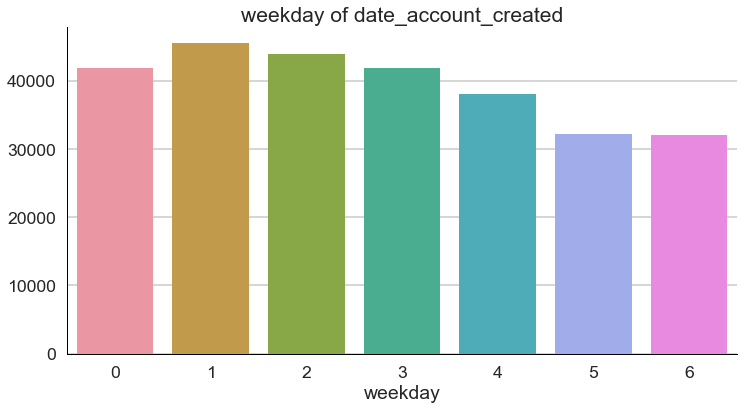

In [40]:
# take weekday from date_account_created
weekdays = []
for date in fulldata.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

plt.figure(figsize=(12,6))
sns.barplot(weekdays.value_counts().index,weekdays.value_counts().values)
plt.xlabel('weekday')
plt.title('weekday of date_account_created')
sns.despine()
plt.show()
# weekdays.value_counts().sort_values(by='index').plot(kind='bar')

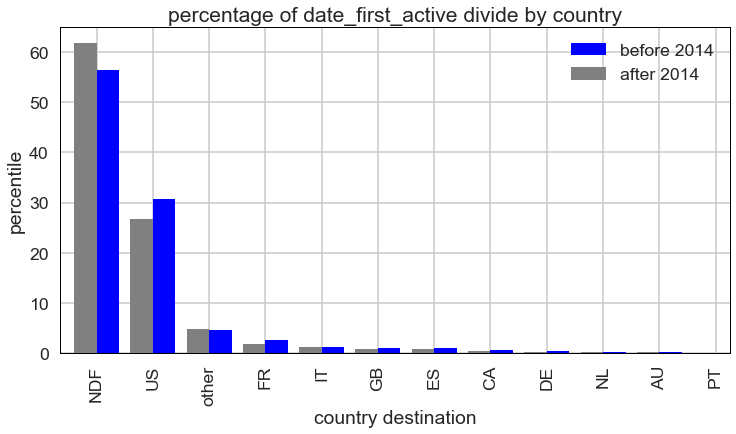

In [41]:
date = pd.to_datetime(20140101,format='%Y%m%d')

before = sum(fulldata.loc[fulldata['date_first_active']<date,'country_destination'].value_counts())
after = sum(fulldata.loc[fulldata['date_first_active']>date,'country_destination'].value_counts())

before_destinations = fulldata.loc[fulldata['date_first_active']<date,'country_destination'].value_counts()/before*100
after_destinations = fulldata.loc[fulldata['date_first_active']>date,'country_destination'].value_counts()/after*100

plt.figure(figsize=(12,6))
before_destinations.plot(kind='bar',width=0.4,color='blue',position=0,label='before 2014')
after_destinations.plot(kind='bar',width=0.4,color='gray',position=1,label='after 2014')
plt.xlabel('country destination')
plt.ylabel('percentile')
plt.title('percentage of date_first_active divide by country')
plt.legend()
plt.show()

In [47]:
before_destinations.dtype

dtype('float64')

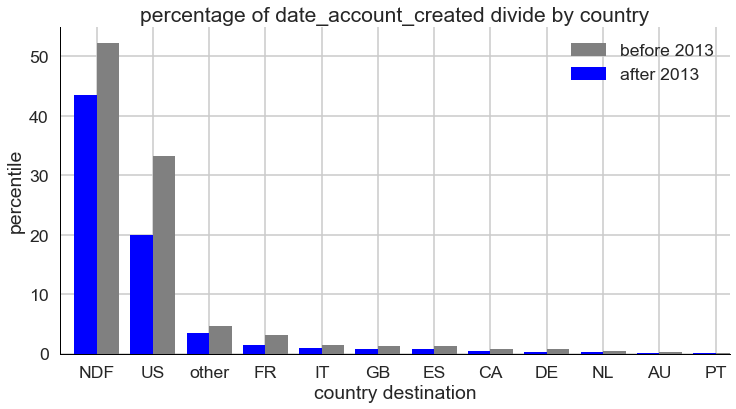

In [42]:
date = pd.to_datetime(20130101,format='%Y%m%d')

before = fulldata.date_account_created.loc[fulldata['date_account_created']<date].value_counts()
after = fulldata.date_account_created.loc[fulldata['date_account_created']>=date].value_counts()

before_destination = fulldata.loc[fulldata['date_account_created']<date,'country_destination'].value_counts()/sum(before)*100
after_destination = fulldata.loc[fulldata['date_account_created']>=date,'country_destination'].value_counts()/sum(after)*100
plt.figure(figsize=(12,6))
before_destination.plot(kind='bar',width=0.4,color='gray',position=0,rot=0,label='before 2013')
after_destination.plot(kind='bar',width=0.4,color='blue',position=1,rot=0,label='after 2013')
plt.title('percentage of date_account_created divide by country')
plt.legend()
plt.ylabel('percentile')
plt.xlabel('country destination')
sns.despine()
plt.show()